In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/Admin/Downloads/bank_transactions.csv')
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


TransactionID, CustomerID, and TransactionDate Doesn't matter, let's drop these features now!

In [3]:
df.drop(columns=['TransactionID', 'CustomerID', 'CustLocation'], inplace=True)

I'm going to extract Customer Age from available features.

In [4]:
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], format='%d/%m/%y', errors='coerce')
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%d/%m/%y', errors='coerce')

def fix_year(date):
    if pd.isna(date):
        return date
    if date.year > 2025:
        return date.replace(year=date.year - 100)
    return date

df['CustomerDOB'] = df['CustomerDOB'].apply(fix_year)

df['CustomerAge'] = df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year

df.drop(columns=['CustomerDOB', 'TransactionDate'], inplace=True)

In [5]:
df

,CustGender,CustAccountBalance,TransactionTime,TransactionAmount (INR),CustomerAge
0,F,17819.05,143207,25.0,22.0
1,M,2270.69,141858,27999.0,59.0
2,F,17874.44,142712,459.0,20.0
3,F,866503.21,142714,2060.0,43.0
4,F,6714.43,181156,1762.5,28.0
...,...,...,...,...,...
1048562,M,7635.19,184824,799.0,26.0
1048563,M,27311.42,183734,460.0,24.0
1048564,M,221757.06,183313,770.0,27.0
1048565,M,10117.87,184706,1000.0,38.0


In [6]:
df.isnull().sum()

CustGender                  1100
CustAccountBalance          2369
TransactionTime                0
TransactionAmount (INR)        0
CustomerAge                60736
dtype: int64

There are many missing values, let's fill these.

In [7]:
df['CustGender'] = df['CustGender'].fillna(df['CustGender'].mode()[0])

In [8]:
df['CustAccountBalance'] = df['CustAccountBalance'].fillna(df['CustAccountBalance'].median())

In [9]:
df['CustomerAge'] = df['CustomerAge'].fillna(df['CustomerAge'].median())

In [10]:
df.isnull().sum()

CustGender                 0
CustAccountBalance         0
TransactionTime            0
TransactionAmount (INR)    0
CustomerAge                0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(67)

There are 67 duplicated rows. Let's drop these.

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

np.int64(0)

Let's see the distribution of Categorical column.

<Axes: xlabel='CustGender'>

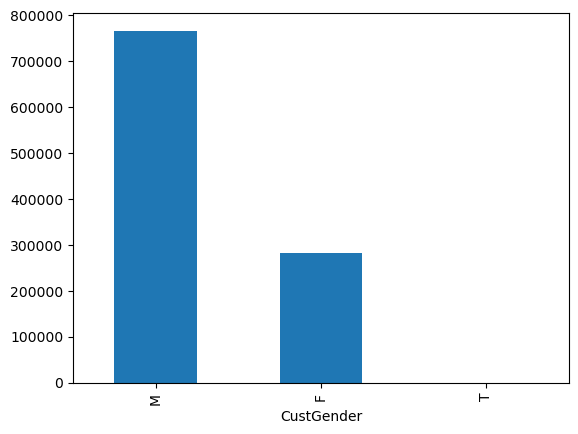

In [14]:
df['CustGender'].value_counts().plot(kind='bar')

Maybe There was a typo, that's why there is a T.

In [15]:
df = df[df['CustGender'].isin(['M', 'F'])]

<Axes: xlabel='CustGender'>

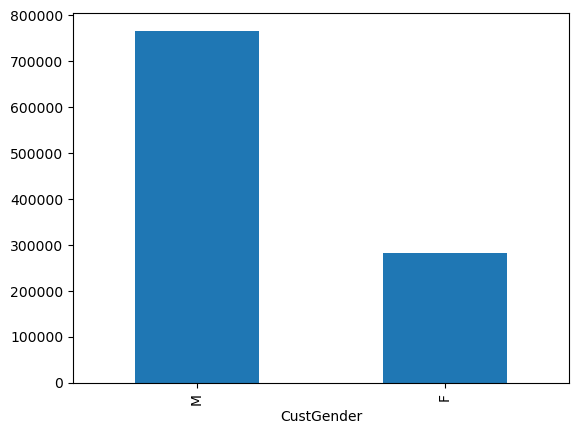

In [16]:
df['CustGender'].value_counts().plot(kind='bar')

More transaction happened by Male than Female

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustAccountBalance,1048499.0,115183.700042,845568.174489,0.0,4740.2,16792.18,57472.88,1.150355e+08
TransactionTime,1048499.0,157090.229890,51260.327868,0.0,124031.0,164227.00,200011.00,2.359590e+05
TransactionAmount (INR),1048499.0,1574.188325,6574.295405,0.0,161.0,459.49,1200.00,1.560035e+06
CustomerAge,1048499.0,30.912317,8.517480,-9.0,25.0,29.00,34.00,9.000000e+01


CustomerAge contains negative ages, let's drop those rows with negative (less than 0) values.

In [18]:
df = df[df['CustomerAge'] >= 0]

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustAccountBalance,1048454.0,115154.773109,845548.412012,0.0,4740.2,16792.18,57472.88,1.150355e+08
TransactionTime,1048454.0,157089.286075,51260.795105,0.0,124031.0,164226.00,200011.00,2.359590e+05
TransactionAmount (INR),1048454.0,1574.159335,6574.413495,0.0,161.0,459.04,1200.00,1.560035e+06
CustomerAge,1048454.0,30.913867,8.514371,0.0,25.0,29.00,34.00,9.000000e+01


Now we have a clean dataset.

In [21]:
df = pd.get_dummies(df, columns=['CustGender'], drop_first=True, dtype=int)

In [22]:
df

,CustAccountBalance,TransactionTime,TransactionAmount (INR),CustomerAge,CustGender_M
0,17819.05,143207,25.0,22.0,0
1,2270.69,141858,27999.0,59.0,1
2,17874.44,142712,459.0,20.0,0
3,866503.21,142714,2060.0,43.0,0
4,6714.43,181156,1762.5,28.0,0
...,...,...,...,...,...
1048562,7635.19,184824,799.0,26.0,1
1048563,27311.42,183734,460.0,24.0,1
1048564,221757.06,183313,770.0,27.0,1
1048565,10117.87,184706,1000.0,38.0,1


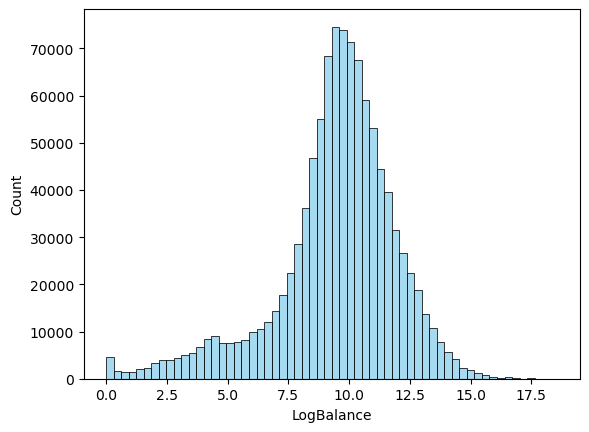

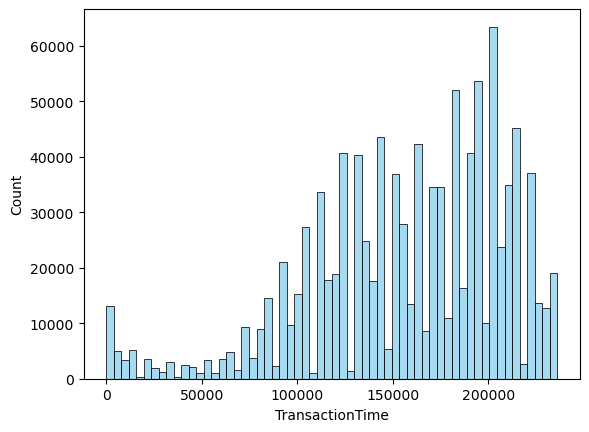

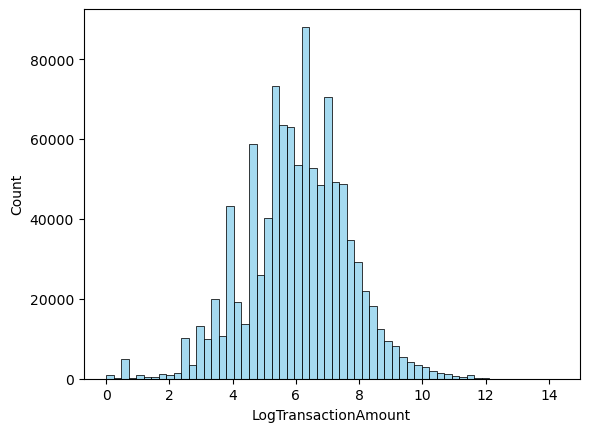

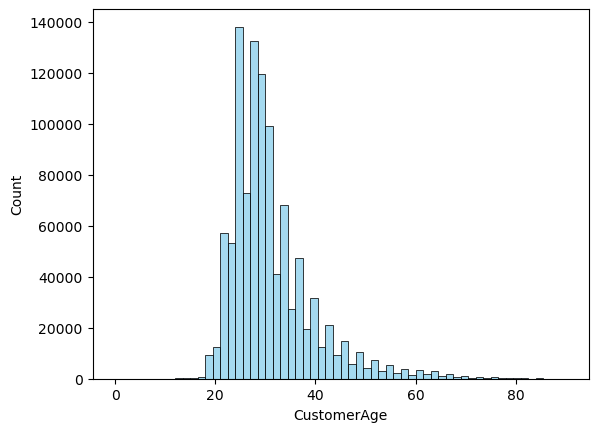

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df['LogBalance'] = np.log1p(df['CustAccountBalance'])
df['LogTransactionAmount'] = np.log1p(df['TransactionAmount (INR)'])
for col in ['LogBalance', 'TransactionTime', 'LogTransactionAmount', 'CustomerAge']:
    sns.histplot(df[col], color='skyblue', bins=60)
    plt.show()

Most customers in the dataset maintain an account balance of around ₹22,000.
Very few customers have extremely high balances — going beyond ₹8 million (log ≈ 16), with rare outliers reaching ₹40 million (log ≈ 17.5).

The log transformation helped:

Reduce the impact of extreme outliers

Reveal the true underlying pattern in customer balances

Prepare the data for distance-based models like KMeans or PCA by making feature scales more comparable

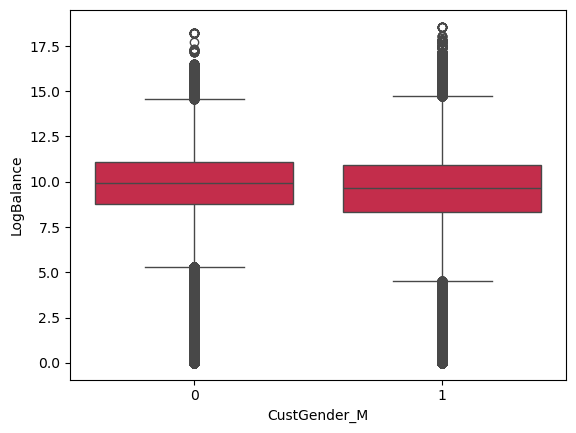

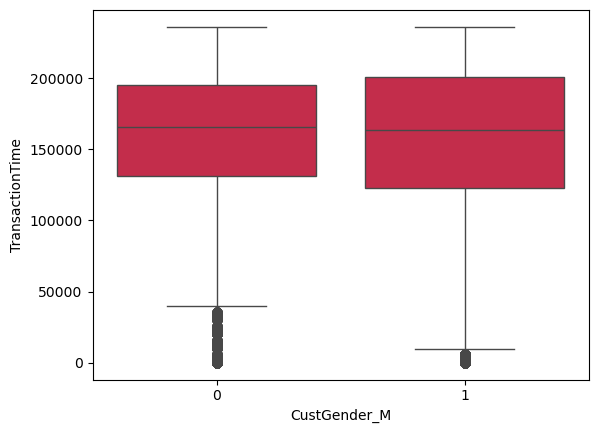

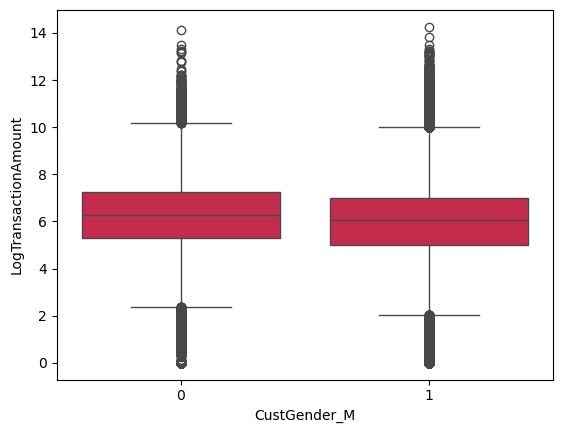

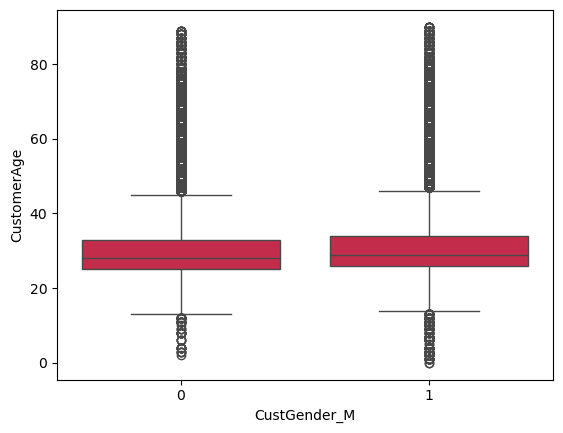

In [31]:
for col in ['LogBalance', 'TransactionTime', 'LogTransactionAmount', 'CustomerAge']:
    sns.boxplot(x=df['CustGender_M'], y=df[col], color='crimson')
    plt.show()

In [33]:
df.drop('CustGender_M', axis=1).corr()

,CustAccountBalance,TransactionTime,TransactionAmount (INR),CustomerAge,LogBalance,LogTransactionAmount
CustAccountBalance,1.000000,-0.004101,0.062491,0.111703,0.232687,0.075236
TransactionTime,-0.004101,1.000000,0.007928,0.001740,0.022255,0.103231
TransactionAmount (INR),0.062491,0.007928,1.000000,0.088681,0.099265,0.408594
CustomerAge,0.111703,0.001740,0.088681,1.000000,0.221235,0.227964
LogBalance,0.232687,0.022255,0.099265,0.221235,1.000000,0.250063
LogTransactionAmount,0.075236,0.103231,0.408594,0.227964,0.250063,1.000000


<Axes: >

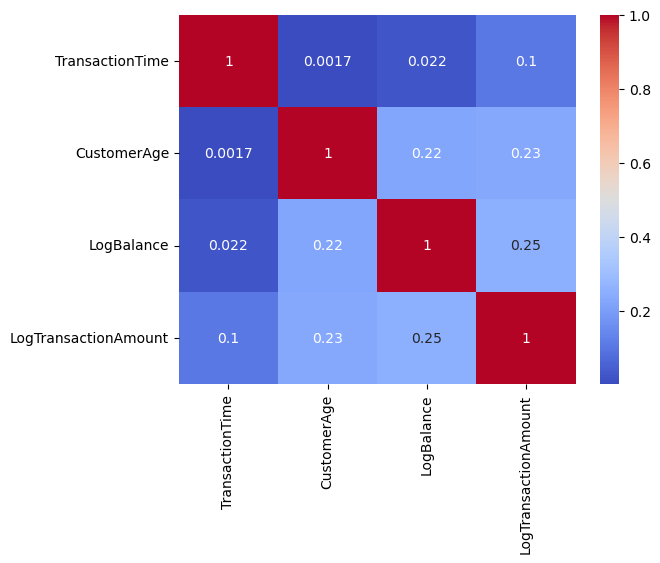

In [36]:
sns.heatmap(df.drop(columns=['CustGender_M', 'CustAccountBalance', 'TransactionAmount (INR)'], axis=1).corr(), annot=True, cmap='coolwarm')

In [39]:
df.to_csv('BankTransactions.csv', index=False)